In [6]:
!conda install -c conda-forge folium=0.5.0 --yes 
!conda install -c conda-forge wget --yes 

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [33]:
import requests
import pandas as pd
import folium # map rendering library
!pip install wget
import wget
import matplotlib.pyplot as plt
import numpy as np



In [15]:
# The code was removed by Watson Studio for sharing.

,ID,NAME,LONG,LAT
0,0,CENTER,48.864716,2.349014
1,1,MUSÉE DU LOUVRE,48.861389,2.335000
2,2,BOURSE,48.865500,2.342600
3,3,MUSÉE CARNAVELET,48.857500,2.362222
4,4,HÔTEL DE VILLE,48.856389,2.352222


In [16]:
# create map of Paris using latitude and longitude values

latitude = 48.8647160
longitude = 2.349014

map_Paris = folium.Map(location=[latitude, longitude], zoom_start=11)

for long,lat,name in zip( df_paris['LAT'],df_paris['LONG'], df_paris['NAME']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

In [17]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: IMP0HDDM5LOW42FTDB5OOEVAZAMVN4Q5WUIL31VC4W5SGPKO
CLIENT_SECRET:1BUWK254U2OUF4JRMOOUWP20RI4X1M0K3M51ENO4DKVIYFX3


In [18]:
# Fiding stores in the radius of 500m
radius = 999
LIMIT = 1000000

venues = []

for lat, long, name in zip( df_paris['LONG'],df_paris['LAT'], df_paris['NAME']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            name,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [20]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Name', 'Latitude','Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

# filter borough names that contain the word Paris
unique_names = list(venues_df.VenueCategory.unique())

restaurant_paris = []

for x in unique_names:
    if "restaurant" in x.lower():
        restaurant_paris.append(x)
    if "sandwich" in x.lower():
        restaurant_paris.append(x)
    if "wine" in x.lower():
        restaurant_paris.append(x)
    if "coffee" in x.lower():
        restaurant_paris.append(x)
    if "beer" in x.lower():
        restaurant_paris.append(x)
    if "bakery" in x.lower():
        restaurant_paris.append(x)
    if "breakfast" in x.lower():
        restaurant_paris.append(x) 
    if "bistro" in x.lower():
        restaurant_paris.append(x) 
    if "pastry" in x.lower():
        restaurant_paris.append(x)
    if "trattoria/osteria" in x.lower():
        restaurant_paris.append(x) 
    if "pizza" in x.lower():
        restaurant_paris.append(x) 
        
# Remains only the neighborhoods that contais the word Toronto
venues_df = venues_df[venues_df['VenueCategory'].isin(restaurant_paris)].reset_index(drop=True)

#Keep the dataframe with duplicate values in memory
duplicate_paris_df = venues_df

# Drop duplicates
venues_df = venues_df.drop_duplicates(subset='VenueName', keep="last")

print(venues_df.shape)
venues_df.head()

(871, 7)


,Name,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
4,CENTER,48.864716,2.349014,Raviolis Chinois Nord-Est,48.862844,2.349621,Chinese Restaurant
6,CENTER,48.864716,2.349014,Rice & Fish,48.865150,2.351435,Sushi Restaurant
9,CENTER,48.864716,2.349014,Bo&Mie,48.864050,2.350444,Bakery
11,CENTER,48.864716,2.349014,Partisan,48.864754,2.353069,Coffee Shop
15,CENTER,48.864716,2.349014,Le Pas Sage,48.864646,2.350066,French Restaurant


In [44]:
# create map of Paris using latitude and longitude values

latitude = 48.8647160
longitude = 2.349014

map_food = folium.Map(location=[latitude, longitude], zoom_start=11)

for latitude,longitude, name, category in zip(venues_df['VenueLatitude'], venues_df['VenueLongitude'], venues_df['VenueName'], venues_df['VenueCategory']):
    label = '{}, {}'.format(name, category)
    label = folium.Popup(label, parse_html=True)
    #print(label)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_food)  
    
map_food

In [22]:

body = client_b412bfc409c0453abf6ed09eb94e3495.get_object(Bucket='capstoneproject-donotdelete-pr-18cpzwkbrd9agv',Key='bordeaux.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_bdx = pd.read_csv(body)
df_bdx.head()



,ID,NAME,LAT,LONG
0,0,BORDEAUX CENTRE,44.833300,-0.566700
1,1,MÉRIADECK,44.836800,-0.586000
2,2,SAINT-CATHARINE,44.839722,-0.574167
3,3,GARE SAINT-JEAN,44.825833,0.555833
4,4,JARDIN PUBLIC,44.848888,-0.578056


In [23]:
# create map of Toronto using latitude and longitude values

latitude = 44.833300
longitude = -0.566700

map_Bdx = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat,long,name in zip( df_bdx['LAT'],df_bdx['LONG'], df_bdx['NAME']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Bdx)  
    
map_Bdx

In [24]:
# Fiding stores in the radius of 99999m in Bordeaux
radius = 3000
LIMIT = 100000

venues = []

for lat, long, name in zip( df_bdx['LAT'],df_bdx['LONG'], df_bdx['NAME']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            name,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [25]:
# convert the venues list into a new DataFrame
venues_df_bdx = pd.DataFrame(venues)

# define the column names
venues_df_bdx.columns = ['Name', 'Latitude','Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
#venues_df = venues_df[venues_df['VenueCategory'] == 'French Restaurant'].reset_index()

# filter borough names that contain the word Toronto
unique_names = list(venues_df_bdx.VenueCategory.unique())

restaurant_paris = []

for x in unique_names:
    if "restaurant" in x.lower():
        restaurant_paris.append(x)
    if "sandwich" in x.lower():
        restaurant_paris.append(x)
    if "wine" in x.lower():
        restaurant_paris.append(x)
    if "coffee" in x.lower():
        restaurant_paris.append(x)
    if "beer" in x.lower():
        restaurant_paris.append(x)
    if "bakery" in x.lower():
        restaurant_paris.append(x)
    if "breakfast" in x.lower():
        restaurant_paris.append(x) 
    if "bistro" in x.lower():
        restaurant_paris.append(x) 
    if "pastry" in x.lower():
        restaurant_paris.append(x)
    if "trattoria/osteria" in x.lower():
        restaurant_paris.append(x) 
    if "pizza" in x.lower():
        restaurant_paris.append(x) 
        
# Remains only the neighborhoods that contais the word Toronto
venues_df_bdx = venues_df_bdx[venues_df_bdx['VenueCategory'].isin(restaurant_paris)].reset_index(drop=True)

#Keep the dataframe with duplicate values in memory
duplicate_bdx_df = venues_df_bdx

# Drop duplicates
venues_df_bdx = venues_df_bdx.drop_duplicates(subset='VenueName', keep="last")

print(venues_df_bdx.shape)
venues_df_bdx.head()

(114, 7)


,Name,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
33,BORDEAUX CENTRE,44.833300,-0.566700,Books & Coffee,44.835976,-0.571408,Coffee Shop
34,BORDEAUX CENTRE,44.833300,-0.566700,L'Œnolimit,44.837020,-0.572042,Wine Bar
37,BORDEAUX CENTRE,44.833300,-0.566700,Padang Padang,44.837373,-0.570986,Asian Restaurant
98,SAINT-CATHARINE,44.839722,-0.574167,el sitio,44.836111,-0.571406,Tapas Restaurant
101,SAINT-CATHARINE,44.839722,-0.574167,Vins Urbains,44.838639,-0.570759,Wine Bar


In [26]:
# create map of Bordeaux using latitude and longitude values

latitude = 44.833300
longitude = -0.566700

map_bdx_food = folium.Map(location=[latitude, longitude], zoom_start=11)

for latitude,longitude, name, category in zip(venues_df_bdx['VenueLatitude'], venues_df_bdx['VenueLongitude'], venues_df_bdx['VenueName'], venues_df_bdx['VenueCategory']):
    label = '{}, {}'.format(name, category)
    label = folium.Popup(label, parse_html=True)
    #print(label)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bdx_food)  
    
map_bdx_food

## Final datasets after preprocessing

In [28]:
venues_df_bdx.head()

,Name,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
33,BORDEAUX CENTRE,44.833300,-0.566700,Books & Coffee,44.835976,-0.571408,Coffee Shop
34,BORDEAUX CENTRE,44.833300,-0.566700,L'Œnolimit,44.837020,-0.572042,Wine Bar
37,BORDEAUX CENTRE,44.833300,-0.566700,Padang Padang,44.837373,-0.570986,Asian Restaurant
98,SAINT-CATHARINE,44.839722,-0.574167,el sitio,44.836111,-0.571406,Tapas Restaurant
101,SAINT-CATHARINE,44.839722,-0.574167,Vins Urbains,44.838639,-0.570759,Wine Bar


In [29]:
venues_df.head()

,Name,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
4,CENTER,48.864716,2.349014,Raviolis Chinois Nord-Est,48.862844,2.349621,Chinese Restaurant
6,CENTER,48.864716,2.349014,Rice & Fish,48.865150,2.351435,Sushi Restaurant
9,CENTER,48.864716,2.349014,Bo&Mie,48.864050,2.350444,Bakery
11,CENTER,48.864716,2.349014,Partisan,48.864754,2.353069,Coffee Shop
15,CENTER,48.864716,2.349014,Le Pas Sage,48.864646,2.350066,French Restaurant


# Exploratory Data Analysis

 ### First, let's find out the types of restaurants that we can find in each city

In [31]:
# Find how many different categories of restaurants there are in Paris
len(venues_df.VenueCategory.unique())

75

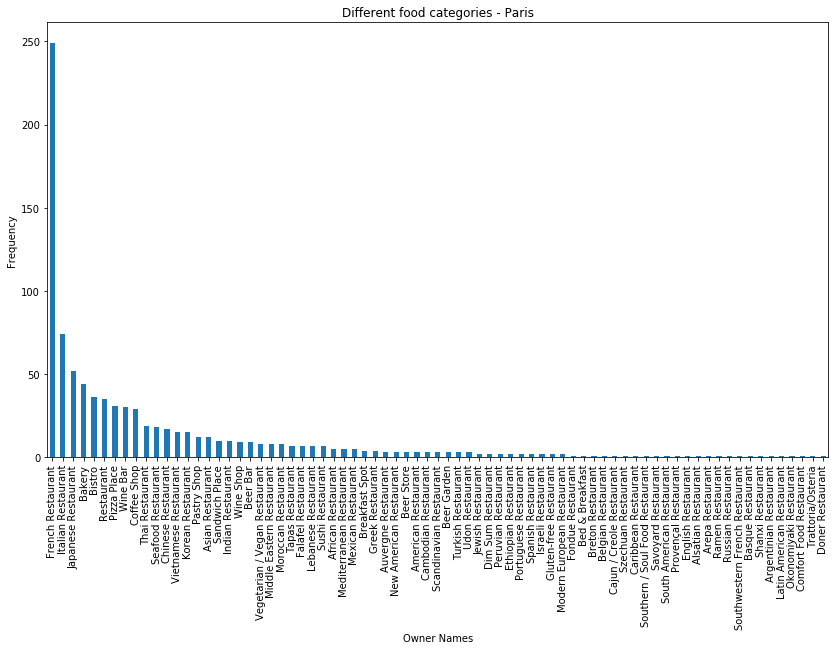

<Figure size 432x288 with 0 Axes>

In [34]:

ax = venues_df.groupby(["VenueCategory"]).count()
ax = venues_df["VenueCategory"].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Different food categories - Paris")
ax.set_xlabel("Owner Names")
ax.set_ylabel("Frequency")
plt.show()
plt.savefig('paris.png')

In [35]:
# Find how many different categories of restaurants there are in Bordeaux
len(venues_df_bdx.VenueCategory.unique())

27

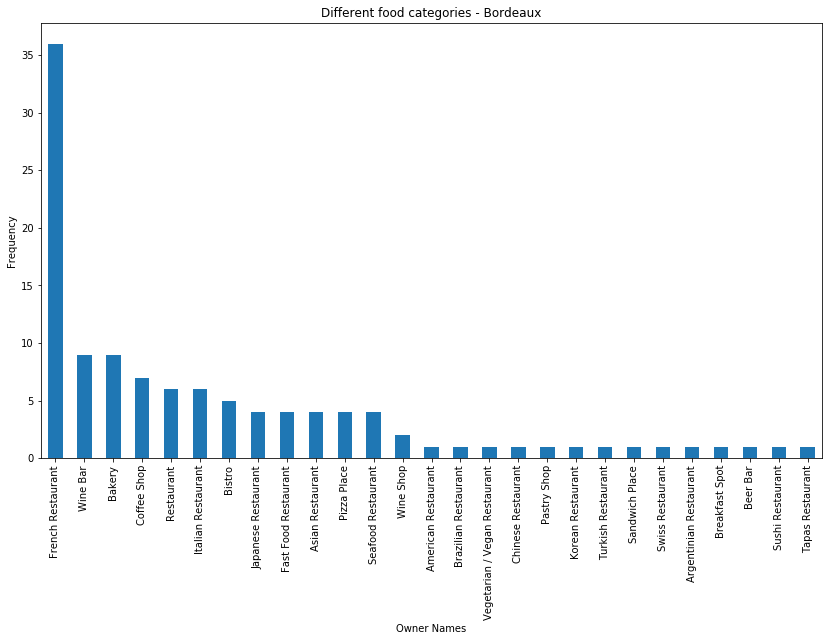

In [36]:

ax = venues_df_bdx.groupby(["VenueCategory"]).count()
ax = venues_df_bdx["VenueCategory"].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Different food categories - Bordeaux")
ax.set_xlabel("Owner Names")
ax.set_ylabel("Frequency")
plt.show()

### We can also find the types of restaurants that we can find in Paris but we cannot find in Bordeaux:

In [37]:
list_1 = list(venues_df["VenueCategory"].unique())
list_2 = list(venues_df_bdx["VenueCategory"].unique())
diff_list = np.setdiff1d(list_1,list_2)
list(diff_list)

['African Restaurant',
 'Alsatian Restaurant',
 'Arepa Restaurant',
 'Auvergne Restaurant',
 'Basque Restaurant',
 'Bed & Breakfast',
 'Beer Garden',
 'Beer Store',
 'Belgian Restaurant',
 'Breton Restaurant',
 'Cajun / Creole Restaurant',
 'Cambodian Restaurant',
 'Caribbean Restaurant',
 'Comfort Food Restaurant',
 'Dim Sum Restaurant',
 'Doner Restaurant',
 'English Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fondue Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Indian Restaurant',
 'Israeli Restaurant',
 'Jewish Restaurant',
 'Latin American Restaurant',
 'Lebanese Restaurant',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Middle Eastern Restaurant',
 'Modern European Restaurant',
 'Moroccan Restaurant',
 'New American Restaurant',
 'Okonomiyaki Restaurant',
 'Peruvian Restaurant',
 'Portuguese Restaurant',
 'Provençal Restaurant',
 'Ramen Restaurant',
 'Russian Restaurant',
 'Savoyard Restaurant',
 'Scandinavian Restaurant',
 'Shanxi Rest

In [38]:
diff_list.size

51

### And the types of restaurants that we can find in Bordeaux but we cannot find in Paris

In [39]:
diff_list_bdx = np.setdiff1d(list_2,list_1)
list(diff_list_bdx)

['Brazilian Restaurant', 'Fast Food Restaurant', 'Swiss Restaurant']

For the data made available by Foursquare, we can realize that there are 75 diferent kind of restaurants in Paris and only 27 in Bordeaux. 

Because Paris is the capital and receives much more tourists than Bordeaux, this results makes sense. The data indicates that Paris is a more globalized city in terms of food and flavors.

We can also visualize which restaurants exist in Paris that do not exist in Bordeaux and vice versa. We have 51 types of restaurants in Paris that we cannot find in Bordeaux, like African and Belgian restaurants and only 3 types of restaurants in Bordeaux that we cannot find in Paris: Brazilian, Swiss and Fast Food, which of course is a foursquare data categorization error.

By looking at the data, we can conclude that if you would like to have italian food experience you should go to Paris, however if you like to go to wine bars, you should definitely go to Bordeaux.

### Let's check the most diverse gastronomic neighborhood for each city! That is, if we could only eat in one block, which one would give you the most options in terms of different categories of restaurants

In [40]:
#PARIS
#Name of cities with most diverse restaurants numbers
list_paris = duplicate_paris_df['Name'].unique()

paris_group = duplicate_paris_df.groupby(['Name', 'VenueCategory']).count()
paris_group

val_paris = []

for n in list_paris:
    val_paris.append(len(paris_group[n:n]))

for d in range(0,len(val_paris)):
    if (val_paris[d] == max(val_paris)):
        print(list_paris[d])


RUE POPINCOURT


In [41]:
max(val_paris)

31

In [42]:
#BORDEAUX
#Name of cities with most diverse restaurants numbers
list_bdx = duplicate_bdx_df['Name'].unique()

bdx_group = duplicate_bdx_df.groupby(['Name', 'VenueCategory']).count()
bdx_group

val_bdx = []

for n in list_bdx:
    val_bdx.append(len(bdx_group[n:n]))

for d in range(0,len(val_bdx)):
    if (val_bdx[d] == max(val_bdx)):
        print(list_bdx[d])


BORDEAUX CENTRE
JARDIN PUBLIC


In [43]:
max(val_bdx)

16

## Conclusion


Clearly we are not getting the full picture of all the restaurants that exists in Paris and Bordeaux. Looking at another prominent site for planning trips, TripAdvisor, we can see that the number of restaurants that are listed in Paris is about 16,503 and in Bordeaux is about 2,328. That consistent with the 8:1 ratio that we found in our Foursquare sample. However, since a lot of category of restaurants are only listed once in Paris, we can't conclude with certain that there aren't restaurants in Bordeaux not listed in the current work because of the Foursquare sample. 